## bank-full_data.csv (Ensemble Techniques and DNN)

Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) 
would be ('yes') or not ('no') subscribed.

To begin this exploratory analysis, first import libraries. 
In this notebook you will learn 
1. Basic EDA (Expolary Data Analysis)
2. How to use matplotlib effectively 
3. How to handle missing values
4. How to apply ensample techniques like XGBoosting
5. how to tune XGBoost parameters
6. Feature importance graph
7. build basic ANN
8. Tune the ANN parameters such as learning rate, activation function, optimizer 

In [2]:
#import librariesimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')
import xgboost as xgb

In [3]:
#importing dataset
df= pd.read_csv("bank-full.csv", sep = ";")
df.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Check the Null vallue of the daqta set
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

So,The contact feature has some unknown values so, it might be null values. So, We have to check all the feature 
where it has null values. 

In [8]:
# So, print the all columns which have unknown values

colum_unknown = []
for col in df.columns:
    if 'unknown' in df[col].values:
        colum_unknown.append(col)
        
print("Columns with Unknown Values are  "+" \n" + str(colum_unknown))      

Columns with Unknown Values are   
['job', 'education', 'contact', 'poutcome']


In [9]:
# Find the unknoun values of each column which we found abouve
print("Unknown values count : \n")
for col in colum_unknown:
    print(col," : ",df[df[col].str.contains('unknown')][col].count())
   

Unknown values count : 

job  :  288
education  :  1857
contact  :  13020
poutcome  :  36959


In [10]:
df.apply(lambda x:len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [11]:
#Seperate  the dependent variables and indipendent variables
y = df.iloc[:, -1].values
numeric_df = df._get_numeric_data()

In [12]:
print(numeric_df.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [14]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)
print(y)


[0 0 0 ... 1 0 0]


<Figure size 720x576 with 0 Axes>

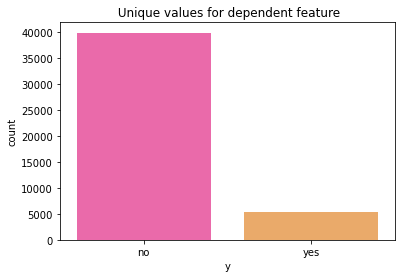

<Figure size 720x576 with 0 Axes>

In [15]:
sns.countplot(df['y'],data=df,palette='spring')
plt.title(' Unique values for dependent feature')
plt.figure(figsize=(10,8))

In [16]:
#Split dataset into training and test set

from sklearn.model_selection import train_test_split
numeric_train, numeric_test, y_train, y_test = train_test_split(numeric_df, y,
                                                    test_size =0.2,random_state=1)

### Understand the xgb.train method then, According to develop the values for each function.

xgb.train(
    params,
    dtrain,
    num_boost_round=10,
    evals=(),
    obj=None,
    feval=None,
    maximize=False,
    early_stopping_rounds=None,
    evals_result=None,
    verbose_eval=True,
    xgb_model=None,
    callbacks=None)
params : dict
    Booster params.
dtrain : DMatrix
    Data to be trained.
num_boost_round: int
    Number of boosting iterations.
evals: list of pairs (DMatrix, string)
    List of validation sets for which metrics will evaluated during training.
    Validation metrics will help us track the performance of the model.
obj : function
    Customized objective function.
feval : function
    Customized evaluation function.
maximize : bool
    Whether to maximize feval.
early_stopping_rounds: int
    Activates early stopping. Validation metric needs to improve at least once in
    every **early_stopping_rounds** round(s) to continue training.
    Requires at least one item in **evals**.

### Part1: Create the XGBoost model only for numeric variable

1. Create the xgboost matrices
2. set the parameters for learning rate, max_depth, colsample_bytree, child_weight etc..
3. develop the xgboost model
4. Tune the parameters

In [17]:
# Create xgboost matrices

Train_1 = xgb.DMatrix(numeric_train, label = y_train)
Test_1 = xgb.DMatrix(numeric_test, label = y_test)

In [18]:
# Set the parameters

parameters1 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [19]:
#run XGBoost

model1 = xgb.train(params = parameters1,
                   dtrain = Train_1,
                   num_boost_round = 200,
                   evals = [(Test_1, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.76399
[50]	Yes-auc:0.87565
[100]	Yes-auc:0.88043
[150]	Yes-auc:0.88216
[199]	Yes-auc:0.88212


In [20]:
#Predictions for test data set

predictions1 = model1.predict(Test_1)
predictions1 = np.where(predictions1 > 0.5, 1, 0)


In [21]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import classification_report
confusion_matrix1 = confusion_matrix(y_test, predictions1)
report1 = classification_report(y_test, predictions1)
print("accuracy of the train data set" + " "+ str(accuracy_score(y_test,predictions1)))
print(report1)

accuracy of the train data set 0.8952781156695787
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.58      0.34      0.43      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



Text(69.0, 0.5, 'Truth')

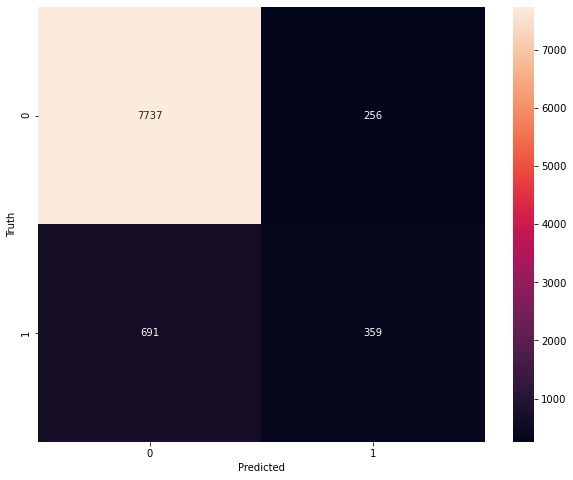

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Part2: Creating  the XGBoost model for numerical variables and categorical variables

 Now consider the catogrical variable also for crating the model and see how accuracy change 

In [24]:
# exctract all catergorical data

df.select_dtypes(exclude='number')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


Isolate the all catogrical variables and convert to the numberic values(get into the dummy variables)

In [25]:
#isolate the categorical variables
df_categorical = df.select_dtypes(exclude = "number")

#tranform categorical variables into dummy variables
df_categorical = pd.get_dummies(data = df_categorical,
                                     drop_first = True)

#joining numerical and categorical datasets
final_df = pd.concat([numeric_df, df_categorical], axis = 1)
#getting names of columns
feature_columns = list(final_df.columns.values)
#feature_columns = list(final_df.columns)
#drop the dependent feature from the final_df
feature_columns = feature_columns[:-1]
print(feature_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [119]:
final_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [120]:
#Isolate the x and y variables

y2 = final_df.iloc[:, -1].values
x2 = final_df.iloc[:, :-1].values
    
# Split dataset into 80% into training and 20% for testing set
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2,
                                                    test_size =0.2,
                                                    random_state=1)

In [121]:
# Create xgboost matrices

Train_2 = xgb.DMatrix(x2_train, label = y2_train, feature_names = feature_columns)
Test_2 = xgb.DMatrix(x2_test, label = y2_test, feature_names = feature_columns)

In [122]:
# Set the parameters
parameters2 = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [123]:
# Run XGBoost
model2 = xgb.train(params = parameters2,
                   dtrain = Train_2,
                   num_boost_round = 200,
                   evals = [(Test_2, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.75486
[50]	Yes-auc:0.92029
[100]	Yes-auc:0.92838
[150]	Yes-auc:0.92993
[199]	Yes-auc:0.93049


In [124]:
# Predictions
predictions2 = model2.predict(Test_2)
predictions2 = np.where(predictions2 > 0.5, 1, 0)

# Confusion Matrix
confusion_matrix2 = confusion_matrix(y2_test, predictions2)

print("accuracy of the train data set" + " "+ str(accuracy_score(y2_test,predictions2)))
report2 = classification_report(y2_test, predictions2)
print(report2)

accuracy of the train data set 0.9085480482140883
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7993
           1       0.66      0.44      0.53      1050

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



Text(69.0, 0.5, 'Truth')

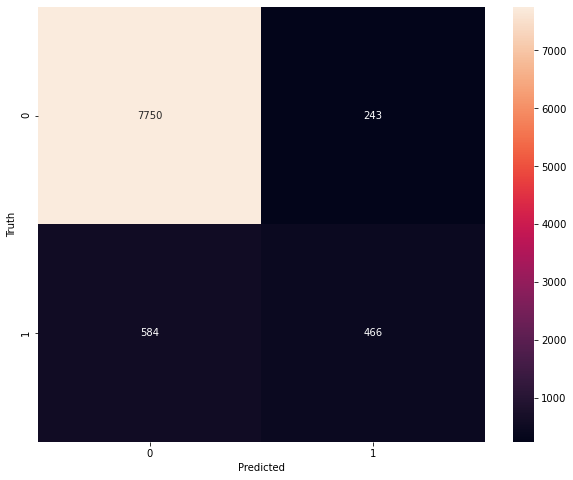

In [125]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix2,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### XGBoost model with KFold cross-validation

In [126]:
# Setting the cross validation parameters

from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1).split(X = x2_train,
                                                y = y2_train)

### Tune the hyper parameters with cross-validation

In [127]:
# Set parameter tuning

tune_grid = {'learning_rate': [0.05, 0.3],
               'max_depth': range(2, 9, 2),
               'colsample_bytree': [0.5, 1],
               'subsample': [1],
               'min_child_weight': [1],
               'gamma': [0], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]}  

In [128]:
# State that we are doing a classification problem

from xgboost import XGBClassifier
classifier = XGBClassifier(objective = "binary:logistic")

### Try  First cross validation

In [129]:
# Cross Validation Assembly

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

In [130]:
# Setting evaluation parameters
evaluation_parameters = {"early_stopping_rounds": 100,
                         "eval_metric": "auc",
                         "eval_set": [(x2_test, y2_test)]}

In [131]:
# Hyperparameter tuning and cross validation
tune_model = grid_search.fit(X = x2_train,y = y2_train,**evaluation_parameters)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   27.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 20.6min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed: 28.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 423.7min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed: 449.2min
[Parallel(n_jobs=6)]: Done 720 out of 720 | elapsed: 456.4min finished


[0]	validation_0-auc:0.85513
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.86474
[2]	validation_0-auc:0.89285
[3]	validation_0-auc:0.89638
[4]	validation_0-auc:0.90129
[5]	validation_0-auc:0.90248
[6]	validation_0-auc:0.90451
[7]	validation_0-auc:0.90742
[8]	validation_0-auc:0.90887
[9]	validation_0-auc:0.90900
[10]	validation_0-auc:0.90982
[11]	validation_0-auc:0.91043
[12]	validation_0-auc:0.91208
[13]	validation_0-auc:0.91362
[14]	validation_0-auc:0.91408
[15]	validation_0-auc:0.91405
[16]	validation_0-auc:0.91363
[17]	validation_0-auc:0.91388
[18]	validation_0-auc:0.91337
[19]	validation_0-auc:0.91431
[20]	validation_0-auc:0.91438
[21]	validation_0-auc:0.91455
[22]	validation_0-auc:0.91498
[23]	validation_0-auc:0.91568
[24]	validation_0-auc:0.91600
[25]	validation_0-auc:0.91672
[26]	validation_0-auc:0.91724
[27]	validation_0-auc:0.91724
[28]	validation_0-auc:0.91734
[29]	validation_0-auc:0.91810
[30]	validation_0-auc:0.91795
[31]	validation

In [132]:
print(grid_search.best_params_, grid_search.best_score_ )

{'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 600, 'random_state': 1502, 'subsample': 1} 0.9361644248601657


### Try second cross validation

In [42]:
# Setting the cross validation parameters
from sklearn.model_selection import KFold
tune_control = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 1502).split(X = x2_train,
                                                y = y2_train)

In [43]:
# Set parameter tuning part2

tune_grid2 = {'learning_rate': [0.05],
               'max_depth': [6],
               'colsample_bytree': [0.5],
               'subsample': [0.9, 1],
               'min_child_weight': range(1,5,1),
               'gamma': [0, 0.1], 
               'random_state': [1502],
               'n_estimators': range(200, 2000, 200),
               'booster': ["gbtree"]}                                                

In [44]:
# Cross Validation Assembly

from sklearn.model_selection import GridSearchCV
grid_search2 = GridSearchCV(estimator = classifier,
                           param_grid = tune_grid2,
                            scoring = "roc_auc",
                            n_jobs = 6,
                            cv = tune_control,
                            verbose = 5)

In [45]:
#Hyperparameter tuning and cross validation

#tune_model2 = grid_search2.fit(X = x2_train,
                             #y = y2_train,
                             #**evaluation_parameters)



Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   30.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed: 24.3min
[Parallel(n_jobs=6)]: Done 276 tasks      | elapsed: 43.4min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed: 67.1min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed: 98.6min
[Parallel(n_jobs=6)]: Done 720 out of 720 | elapsed: 112.9min finished


[0]	validation_0-auc:0.85589
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.86457
[2]	validation_0-auc:0.89279
[3]	validation_0-auc:0.89654
[4]	validation_0-auc:0.90140
[5]	validation_0-auc:0.90268
[6]	validation_0-auc:0.90453
[7]	validation_0-auc:0.90749
[8]	validation_0-auc:0.90902
[9]	validation_0-auc:0.90909
[10]	validation_0-auc:0.90984
[11]	validation_0-auc:0.91039
[12]	validation_0-auc:0.91199
[13]	validation_0-auc:0.91362
[14]	validation_0-auc:0.91411
[15]	validation_0-auc:0.91410
[16]	validation_0-auc:0.91367
[17]	validation_0-auc:0.91389
[18]	validation_0-auc:0.91339
[19]	validation_0-auc:0.91431
[20]	validation_0-auc:0.91440
[21]	validation_0-auc:0.91465
[22]	validation_0-auc:0.91507
[23]	validation_0-auc:0.91604
[24]	validation_0-auc:0.91624
[25]	validation_0-auc:0.91696
[26]	validation_0-auc:0.91738
[27]	validation_0-auc:0.91732
[28]	validation_0-auc:0.91745
[29]	validation_0-auc:0.91829
[30]	validation_0-auc:0.91814
[31]	validation

In [61]:
print(grid_search2.best_params_, grid_search2.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 600, 'random_state': 1502, 'subsample': 1} 0.9355959064807038


### 3rd hyper parameter tuning

In [49]:
#Set the parameters part 3

parameters3 = {'learning_rate': 0.05,
               'max_depth': 6,
               'colsample_bytree': 0.5,
               'subsample': 1,
               'min_child_weight': 2,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [51]:
# Run XGBoost part 3
model3 = xgb.train(params = parameters3,
                   dtrain = Train_2,
                   num_boost_round = 800,
                   evals = [(Test_2, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.85589
[50]	Yes-auc:0.92302
[100]	Yes-auc:0.92802
[150]	Yes-auc:0.93209
[200]	Yes-auc:0.93345
[250]	Yes-auc:0.93371
[300]	Yes-auc:0.93415
[350]	Yes-auc:0.93449
[400]	Yes-auc:0.93475
[450]	Yes-auc:0.93513
[500]	Yes-auc:0.93504
[550]	Yes-auc:0.93505
[600]	Yes-auc:0.93515
[650]	Yes-auc:0.93495
[700]	Yes-auc:0.93479
[750]	Yes-auc:0.93479
[799]	Yes-auc:0.93477


In [54]:
# Predictions part 3
predictions3 = model3.predict(Test_2)
predictions3 = np.where(predictions3 > 0.05, 1, 0)

In [85]:
# Confusion Matrix
confusion_matrix3 = confusion_matrix(y2_test, predictions3)
print("accuracy of the train data set" + " "+ str(accuracy_score(y2_test,predictions2)))
report3 = classification_report(y_test, predictions3)
print(report3)

accuracy of the train data set 0.9085480482140883
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      7993
           1       0.34      0.96      0.51      1050

    accuracy                           0.78      9043
   macro avg       0.67      0.86      0.68      9043
weighted avg       0.92      0.78      0.82      9043



Text(69.0, 0.5, 'Truth')

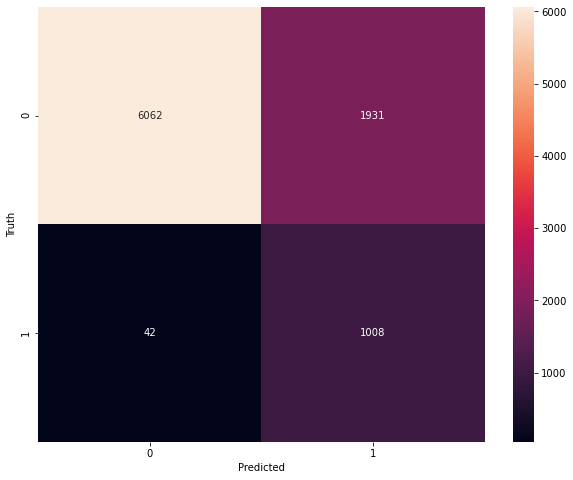

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix3,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

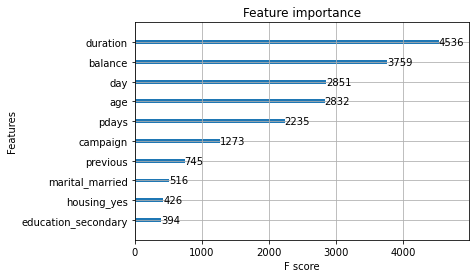

In [57]:
#plot importances
xgb.plot_importance(model3, max_num_features = 10)

In [59]:
#Preparing SHAP
#pip install shap
#conda install -c conda-forge shap
import shap
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(x2_test)

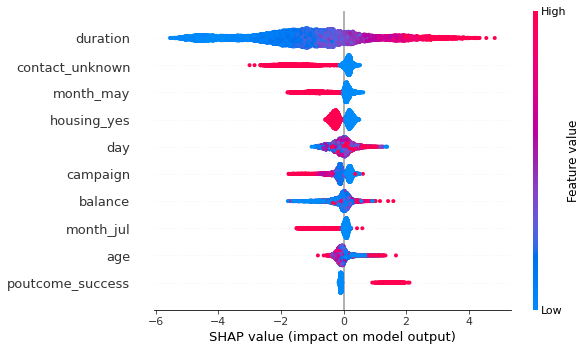

In [60]:
#shap plotting
shap.summary_plot(shap_values,
                  x2_test,
                  feature_names = feature_columns,
                  max_display = 10)

### Build ANN with one hidden layer

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle

In [34]:
x_ann=final_df.iloc[:,0:42]


In [35]:
final_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Feature Scaling Process

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc=StandardScaler()
x_train,x_test,y_train,y_test= train_test_split(x_ann, y, test_size = 0.2, random_state = 0, stratify = y)
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [37]:
print(x_train.shape)

(36168, 42)


In [38]:
model=Sequential()
# Firstly, we will develop the input layer 
model.add(Dense(x_ann.shape[1],activation="relu",kernel_initializer = 'he_normal',bias_initializer='zeros'))
# Hidden Layer
model.add(Dense(128,activation="relu"))
#Out put layer
model.add(Dense(1,activation="sigmoid"))

### Compiling the ANN

In [39]:
model.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x=x_train,y=y_train,batch_size=10,epochs=20,verbose=1)

Epoch 1/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2651 - accuracy: 0.8941
Epoch 2/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2236 - accuracy: 0.9018
Epoch 3/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2146 - accuracy: 0.9038
Epoch 4/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2102 - accuracy: 0.9062
Epoch 5/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.2064 - accuracy: 0.9069
Epoch 6/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.2031 - accuracy: 0.9094
Epoch 7/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.2008 - accuracy: 0.9098
Epoch 8/20
3617/3617 [==============================] - 4s 1ms/step - loss: 0.1987 - accuracy: 0.9101
Epoch 9/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1965 - accuracy: 0.9112
Epoch 10/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.194

### Build ANN with two hidden layers and different optimizers function

In [113]:
initializer = tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform')

In [42]:
model2=Sequential()
# Firstly, we will develop the input layer 
model2.add(Dense(x_ann.shape[1],activation="relu",
                 kernel_initializer = initializer,bias_initializer='zeros',input_dim = x_ann.shape[1]))
# first Hidden Layer
model2.add(Dense(128,activation="relu",kernel_initializer = initializer))
#Second hidden layer
model2.add(Dense(64,activation="relu",kernel_initializer = initializer))
#Out put layer
model2.add(Dense(1,activation="sigmoid"))

In [43]:
model2.compile(optimizer="adamax",loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model2.fit(x=x_train,y=y_train,batch_size=10,epochs=20,verbose=1)

Epoch 1/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1724 - accuracy: 0.9229
Epoch 2/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1708 - accuracy: 0.9247
Epoch 3/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1697 - accuracy: 0.9249
Epoch 4/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1683 - accuracy: 0.9253
Epoch 5/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1670 - accuracy: 0.9276
Epoch 6/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1653 - accuracy: 0.9285
Epoch 7/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1638 - accuracy: 0.9278
Epoch 8/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1625 - accuracy: 0.9309
Epoch 9/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.1618 - accuracy: 0.9309
Epoch 10/20
3617/3617 [==============================] - 5s 1ms/step - loss: 0.159

### Tune the hyper parameters of DNN parameters

In [57]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [103]:
# Assign some values for learningrate, epochs and decay_rate
epochs=60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
# Stochastic gradeint desent
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [104]:
# build the model
input_dim = x_ann.shape[1]
lr_model = Sequential()
lr_model.add(Dense(x_ann.shape[1], activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) 
lr_model.add(Dropout(0.1))
lr_model.add(Dense(128, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(1, kernel_initializer='uniform', activation=tf.nn.sigmoid))

# compile the model
lr_model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [105]:
%%time
# Fit the model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
1131/1131 [==============================] - 1s 1ms/step - loss: 0.2382 - acc: 0.8969 - val_loss: 0.2140 - val_acc: 0.9025
Epoch 2/60
1131/1131 [==============================] - 1s 882us/step - loss: 0.2122 - acc: 0.9035 - val_loss: 0.2111 - val_acc: 0.9037
Epoch 3/60
1131/1131 [==============================] - 1s 909us/step - loss: 0.2075 - acc: 0.9042 - val_loss: 0.2076 - val_acc: 0.9039
Epoch 4/60
1131/1131 [==============================] - 1s 885us/step - loss: 0.2040 - acc: 0.9056 - val_loss: 0.2071 - val_acc: 0.9040
Epoch 5/60
1131/1131 [==============================] - 1s 921us/step - loss: 0.2024 - acc: 0.9067 - val_loss: 0.2063 - val_acc: 0.9028
Epoch 6/60
1131/1131 [==============================] - 1s 1ms/step - loss: 0.2003 - acc: 0.9075 - val_loss: 0.2042 - val_acc: 0.9042
Epoch 7/60
1131/1131 [==============================] - 1s 1ms/step - loss: 0.1984 - acc: 0.9083 - val_loss: 0.2051 - val_acc: 0.9049
Epoch 8/60
1131/1131 [==============================] 

### Plot the loss vs epoch graph

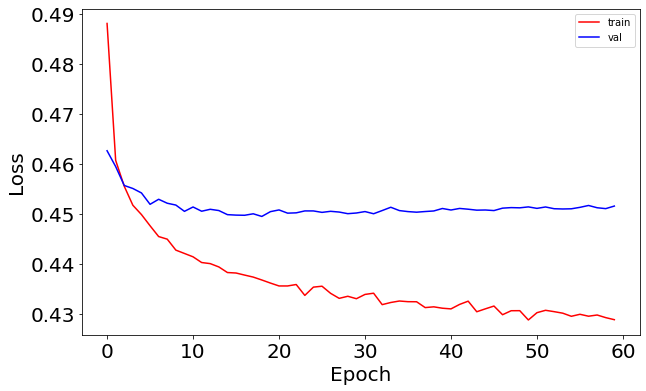

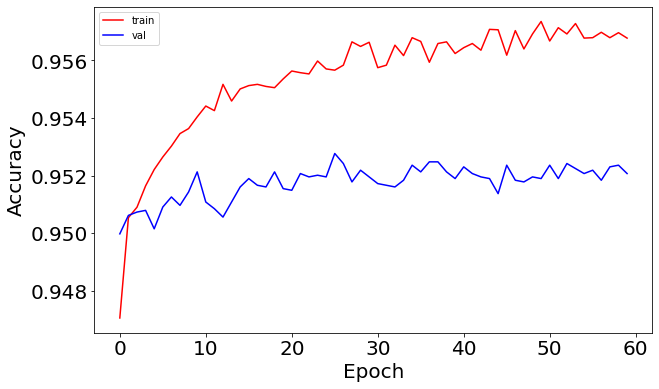

In [106]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Develop the exponential decay model

In [107]:

epochs = 60
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

input_dim = x_ann.shape[1]
num_classes = 1
batch_size = 196

# build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(x_ann.shape[1], activation=tf.nn.relu, kernel_initializer='uniform', 
                                  input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(128, kernel_initializer='uniform', activation=tf.nn.relu))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.sigmoid))

# compile the model
exponential_decay_model.compile(loss='binary_crossentropy', 
                                optimizer=sgd, 
                                metrics=['acc'])
                                
# define the learning rate change 
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate
    
# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=1,
                                    validation_data=(x_test, y_test))

Epoch 1/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3756 - acc: 0.8829 - val_loss: 0.3569 - val_acc: 0.8830
Epoch 2/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3553 - acc: 0.8830 - val_loss: 0.3539 - val_acc: 0.8830
Epoch 3/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3530 - acc: 0.8830 - val_loss: 0.3520 - val_acc: 0.8830
Epoch 4/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3514 - acc: 0.8830 - val_loss: 0.3507 - val_acc: 0.8830
Epoch 5/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3502 - acc: 0.8830 - val_loss: 0.3496 - val_acc: 0.8830
Epoch 6/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3493 - acc: 0.8830 - val_loss: 0.3487 - val_acc: 0.8830
Epoch 7/60
185/185 [==============================] - 0s 2ms/step - loss: 0.3484 - acc: 0.8830 - val_loss: 0.3480 - val_acc: 0.8830
Epoch 8/60
185/185 [==============================] - 0s 2ms/step - loss: 0.

In [108]:
# Develop the model and compile

model = Sequential()
model.add(Dense(input_dim, activation=tf.nn.relu, kernel_initializer='uniform', 
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='uniform', activation=tf.nn.relu))
model.add(Dense(num_classes, kernel_initializer='uniform', activation=tf.nn.sigmoid))

# defining the parameters for RMSprop (I used the keras defaults here)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=rms,
              metrics=['acc'])

In [109]:
# Fit the model
%%time
batch_size = input_dim
epochs = 60

model_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/60
862/862 [==============================] - 1s 1ms/step - loss: 1.3945e-08 - acc: 0.7189 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 2/60
862/862 [==============================] - 1s 1ms/step - loss: 1.3945e-08 - acc: 0.7181 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 3/60
862/862 [==============================] - 1s 977us/step - loss: 1.3945e-08 - acc: 0.7186 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 4/60
862/862 [==============================] - 1s 1ms/step - loss: 1.3945e-08 - acc: 0.7167 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 5/60
862/862 [==============================] - 1s 984us/step - loss: 1.3945e-08 - acc: 0.7200 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 6/60
862/862 [==============================] - 1s 999us/step - loss: 1.3945e-08 - acc: 0.7193 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 7/60
862/862 [==============================] - 1s 982us/step - loss: 1.3945e-08 - acc: 0.7213 - val_loss: 1.3947e-08 - val_acc: 0.7176
Epoch 8/60
8

Test loss: 1.3947078159048942e-08
Test accuracy: 0.7175716161727905


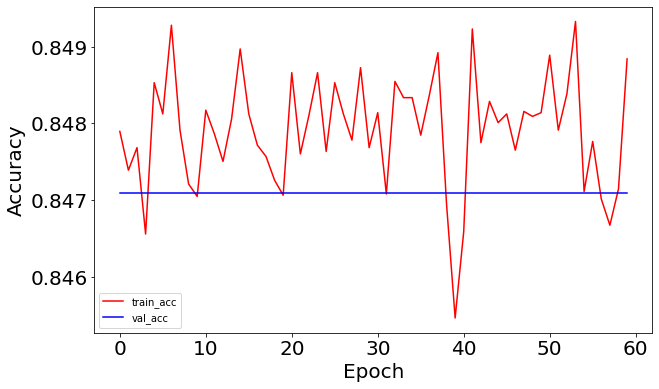

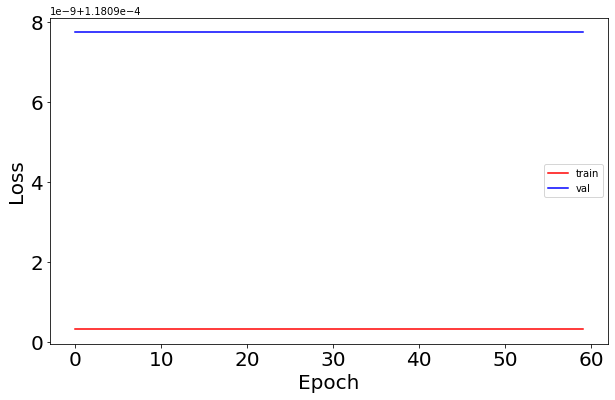

In [110]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['acc']), 'r', label='train_acc')
ax.plot(np.sqrt(model_history.history['val_acc']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Conclusion

Unfortunately, for this data xgboost, ANN and DNN gave accuracy around 91% and also for the test data 89%. My intention was, how to tune the parameters for xgboost and ANN.